# Section 3


In [1]:
# ensure src is in path
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import scipy.stats
import pylab

import matplotlib.pyplot as plt

[3.14 Loading the Data -
Udemy](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275478#overview)


In [3]:
raw_csv_data = pd.read_csv("../data/Index2018.csv")

In [4]:
# Preserve a copy of the unaltered DataFrame
df_comp = raw_csv_data.copy()

## Initial explorations


- [3.15 Examining the
  Data](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275480#overview)


In [5]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Note that the average price for the S&P is quite lower. The maximum value of the S&P is lower than the minimum value of the FTSE and Nikkei.

This difference in magnitude will need to be taken into account when making comparisons.

Values for the Dax and FTSE are similar.
S&P is smaller, Nikkei is larger.


In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Check for missing values


In [7]:
# remember: isna() returns a boolean series
# use sum to get total na per column
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data


- [3.16 Plotting the
  Data](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275482#overview)


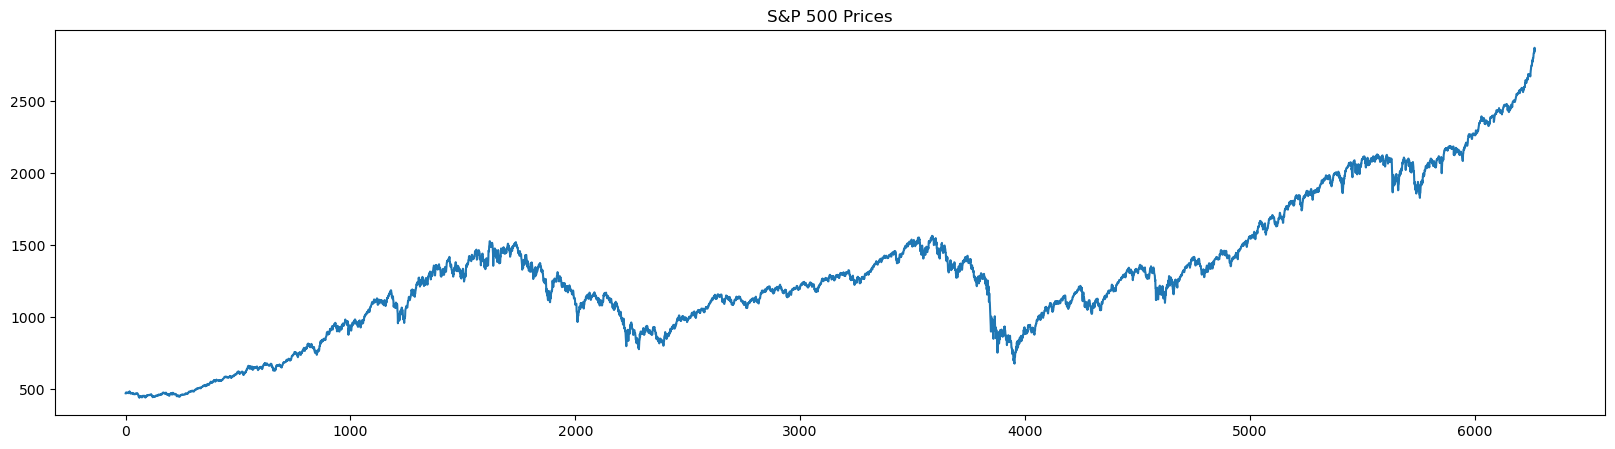

In [8]:
# S&P 500
df_comp.spx.plot(
    figsize=(20, 5),
    title="S&P 500 Prices"
)
plt.show()

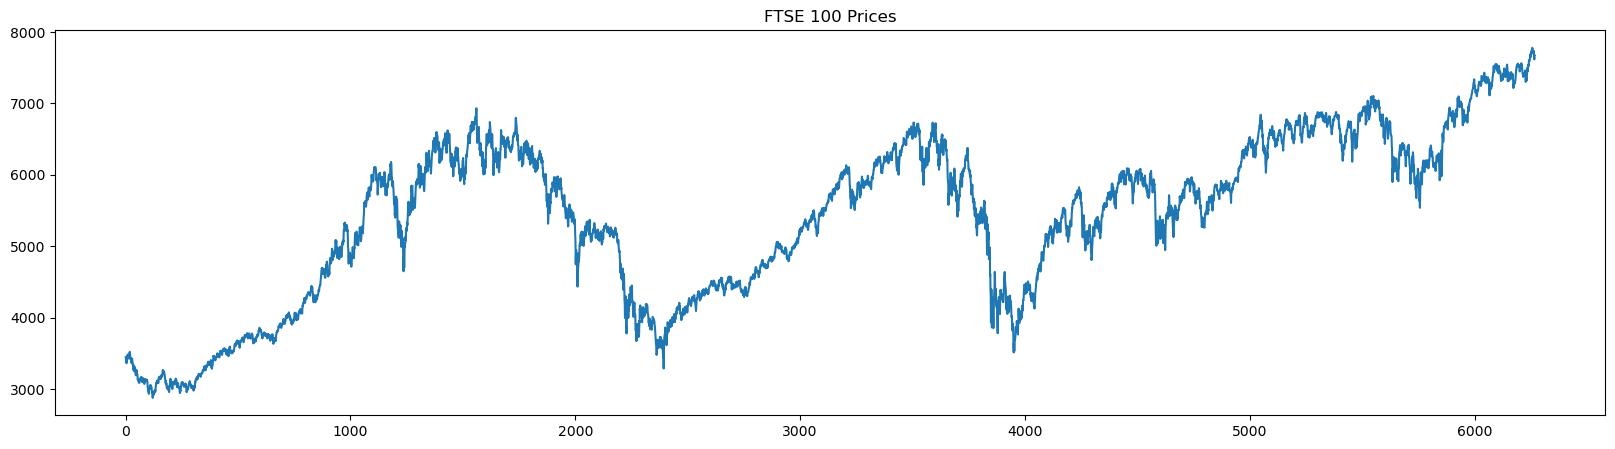

In [9]:
# FTSE 100
df_comp.ftse.plot(
    figsize=(20, 5),
    title="FTSE 100 Prices"
)
plt.show()

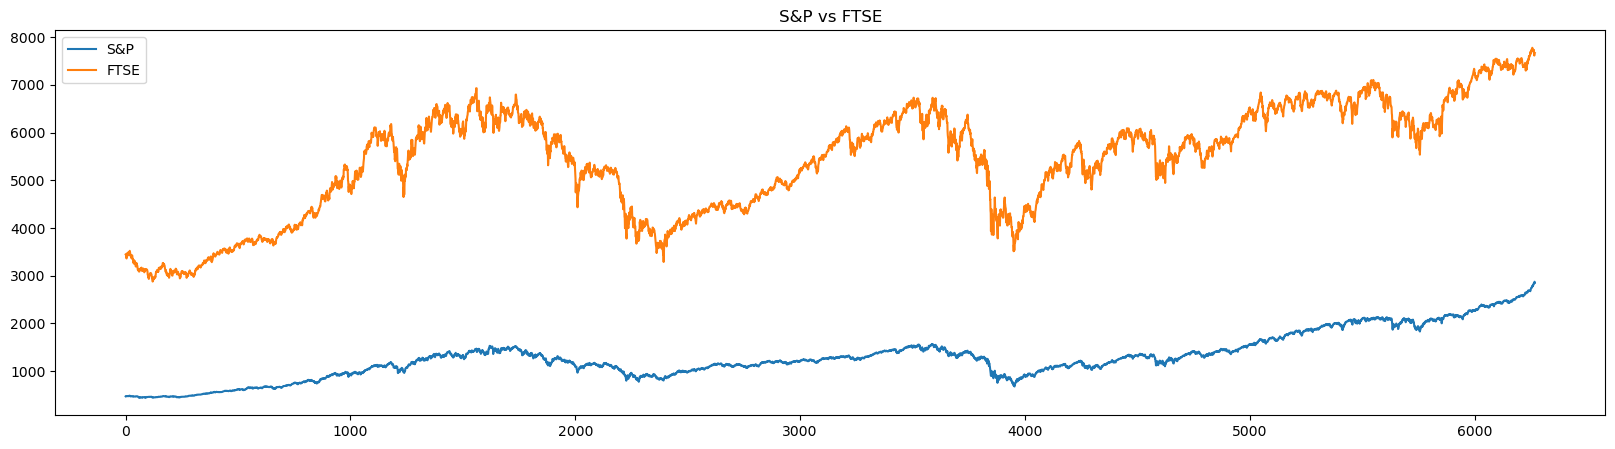

In [10]:
# S&P 500 vs FTSE 100

df_comp["spx"].plot(
    figsize=(20, 5),
    title="S&P500 Prices",
    label='S&P')

df_comp["ftse"].plot(
    figsize=(20, 5),
    title="FTSE 100 Prices",
    label="FTSE")

plt.title("S&P vs FTSE")

plt.legend()
plt.show()

- [3.17 QQ Plot](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275490#overview)


Helps determine if distribution fits specific distribution (normal by
default).

Reminders:

- x-axis: how many standard deviations from the mean these values are.
- red line: What the data points should follow if the points are normally
  distributed

This data is not normally distributed (note the values clustering around 500)


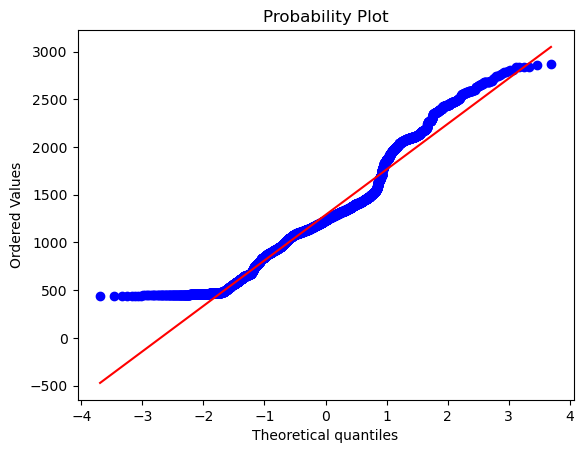

In [11]:
scipy.stats.probplot(
    df_comp["spx"],
    plot=pylab
)

pylab.show()

## Convert to time series, split data for training and testing


- [3.18 Transforming string imports to DateTime
  values](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275494#overview)


Length of date colum.

- call `describe` method
- If column is text ,`top` is completely arbitrary
  - all non-empty `string` values are considered `1`, so this ends up being arbitrary

The `pd.to_datetime` method assumes the date is a `str` in "mm/dd/yyy" form.

The data in this table is saved as "dd/mm/yy" format.


In [12]:
df_comp['date'].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [13]:
df_comp["date"] = pd.to_datetime(
    df_comp["date"],
    dayfirst=True)

In [14]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df_comp["date"].describe(
    datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [16]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


- [3.19 Using Date as an
  Index](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275496#overview)

Set `date` column to index.

Remember: once the `date` column is an index, it cannot be treated as a
column.


In [17]:
df_comp.set_index(
    "date",
    inplace=True)

In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


- [3.20 Setting the
  Frequency](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275498#overview)

`.as_freq()` method.

- 'h' - hourly
- 'w' - weekly
- 'd' - daily
- 'm' - monthly
- 'a' - annual (yearly)
- 'b' - business days only

If values don't exist for generated date, the columns will be populated
with `NaN` values.


In [19]:
# daily will add all days, including weekends.
df_comp = df_comp.asfreq('d')

# note the NaN values for 01-08 and 01-09
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


Financial data is not recorded on weekends or holidays.

The dates `1994-01-08` and `1994-01-09` are Saturday and Sunday.


In [20]:
# only use business days
df_comp = df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


- [missing
  values](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275502#overview)

Setting the frequency to business day added 8 `NaN` values across the
dataset.

Use `fillna()` method:

- `method='ffill'`: front filling assigns the value of the previous period
- `method='bfill'`: assign the value for the next period
- assign the next value (sometimes the mean)

Assigning the mean is not a good approach with time series data.

Try out different approaches.


In [21]:
# note that each column is missing 8 values
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [22]:
# spx: front fill
df_comp['spx'].fillna(method='ffill', inplace=True)

# ftse: backfill
df_comp['ftse'].fillna(method='bfill', inplace=True)

# dax: assign mean
# this is usually a poor approach
# only appropriate if if closely fluctuates around the mean
# throughout the period
df_comp['dax'].fillna(
    value=df_comp['dax'].mean(),
    inplace=True)

In [23]:
df_comp['nikkei'].fillna(
    method='ffill',
    inplace=True)

df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Getting rid of supplementary data

- adding and removing columns


In [24]:
# make a new column that duplicates spx
df_comp['market_value'] = df_comp['spx']

In [25]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [26]:
# removing columns

del df_comp['dax'], df_comp['ftse'], df_comp['nikkei'], df_comp['spx']

In [27]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Train Test Split

You can't really shuffle time series data as you do for other machine learning methods.

Training and testing must be uninterrupted series of data.

- Training set: the entire time series up to some cutoff.
- Testing: the rest after the cutoff.

The size of the training data is up for debate

- Too large and it will over-fit
- Too small: will not be accurate enough

For the purposes of this exercise, we'll use an 80-20 split.


In [28]:
# find cutoff point.
total_size = len(df_comp['market_value'])  # 6277 observations

training_percent = 0.8

# get number of training observations at 80% split
size = int(total_size * training_percent)  # 5021

In [29]:
# Training
df = df_comp.iloc[:size]

# Testing
df_test = df_comp.iloc[size:]

## Appendix Updating the Dataset

- [Appendix](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16390632#overview)


## White Noise

- [White Noise](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275516#overview)

White noise has a constant mean, a constant variance, and no autocorrelation.

no autocorrelation = no clear relationship between past and present values.

A sequence of random data where every value has a time period associated with it.

It's important to be able to distinguish white noise vs. time series data.


In [30]:
wn = np.random.normal(
    loc=df['market_value'].mean(),
    scale=df['market_value'].std(),
    size=len(df))

In [31]:
df['wn'] = wn

/var/folders/2z/36_j5ff923s40202c52y0ljm0000gp/T/ipykernel_45641/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [33]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.949809
std,292.559287,290.712243
min,438.920000,5.247776
25%,914.620000,897.892968
50%,1144.650000,1097.359634
75%,1316.280729,1288.376850
max,1570.252238,2203.868123


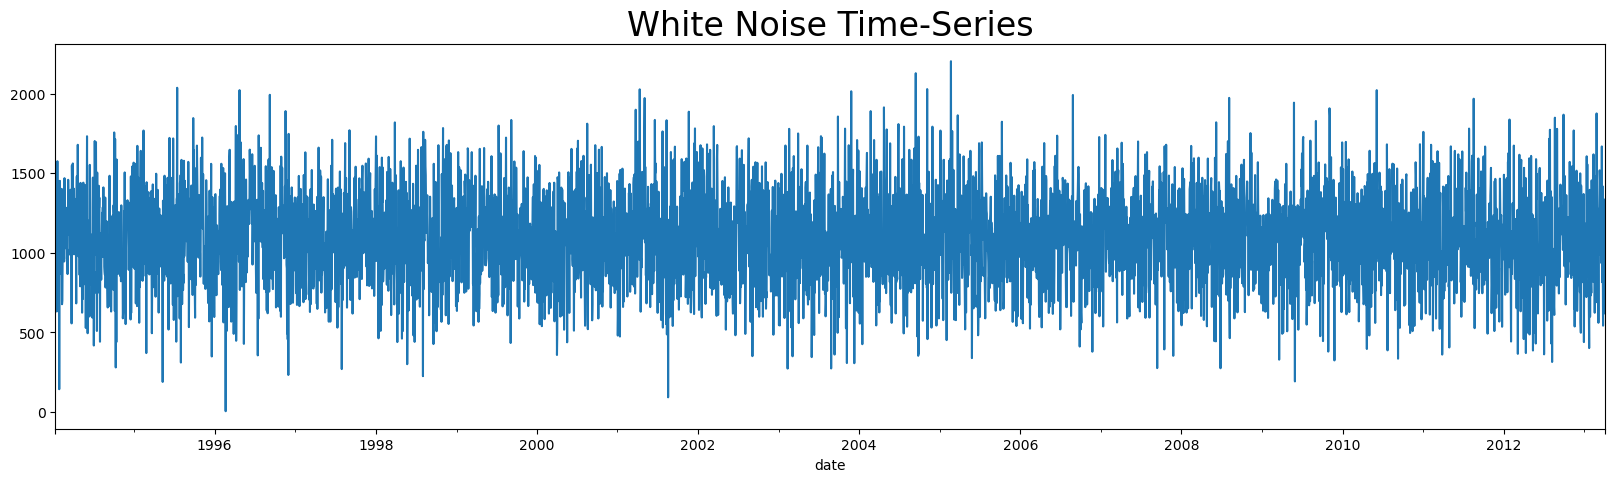

In [41]:
df['wn'].plot(figsize=(20, 5))
plt.title('White Noise Time-Series', size=24)
plt.show()

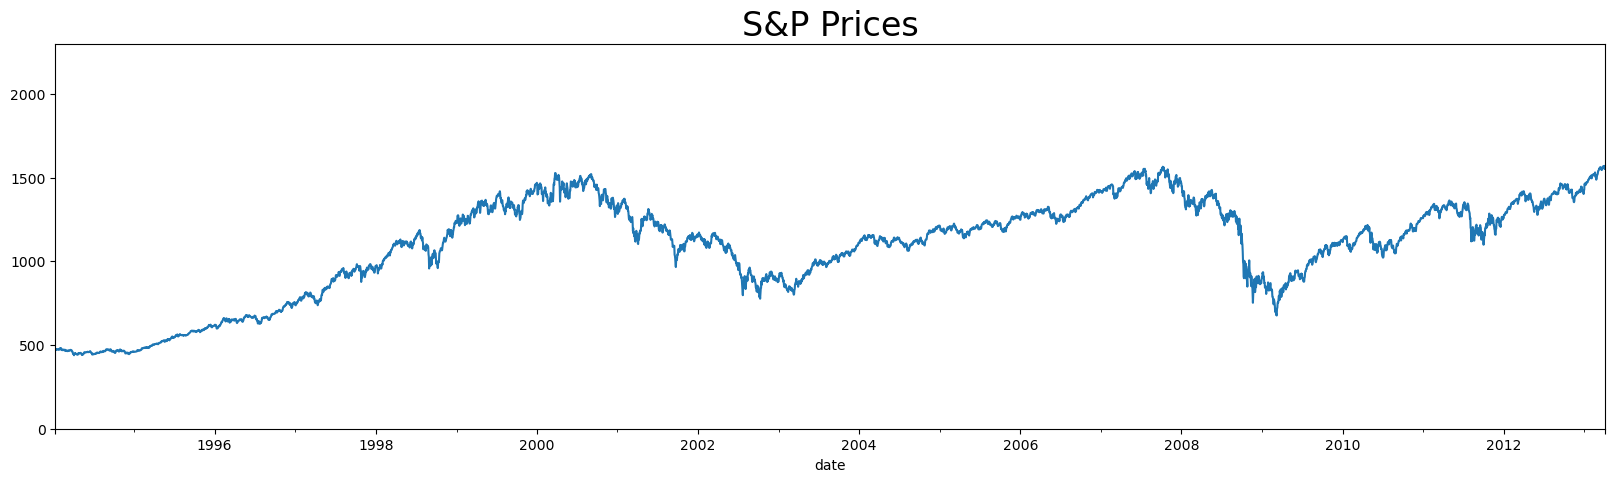

In [42]:
df['market_value'].plot(figsize=(20, 5))
plt.title("S&P Prices", size=24)
plt.ylim(0, 2300)
plt.show()

## Random walk

- [Random walk](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275518#overview)
